# Building a simple Content-Based Recommender System for Netflix Movies and TV Shows

### Objective
With over 6000 movie and tv shows in a sample dataset, there is an overwhelming number of entertainment options available to Netflix users. As such, the purpose of this project aims to make a TV show / movie recommendation using a simple content based recommender system. We would take in an input which is a user's personal favourite show/movies and pick up the top 10 films that are most similar to the personal favourite. Here, we explore 2 possible ways to identify similar items: (1) a simple similarity measure - Cosine Similarity (2) Clustering Algorithm - Latent Dirichlet Allocation (LDA).

### Basics on Recommender System
Recommender Systems can be generally divided into 2 categories: Collaborative Filtering System and Content-based Recommender System. A Collaborative Filtering recommends an item that other users of similar characteristics have liked in the past. A content-based recommender system recommends an item which are similar to the ones the user has liked in the past. Since the given dataset only contains item data, we would focus on creating a basic content-based recommender system. 

### Basics on Text Similarity

There are various text similarity metrics and one of the popular metrics is Cosine Similarity. 
Consine Similarity measures the similarity between 2 documents by measuring the consine of angle between two vectors. Here's a simple example to illustrate the calculation of cosine similarity:



![image.png](attachment:image.png)

### Basics on Topic Modelling
Topic Modelling is an unsupervised learning technique which groups documents based on the content similarity. One popular algorithm is Latent Dirichlet Allocation (LDA). In LDA, each topic is a probability distribution of words and each document is a probability distribution of topics. The more similar the documents are, the closer they are to each other in the multi-dimensional vector space, thus forming clusters. 




### References
https://www.cse.iitk.ac.in/users/nsrivast/HCC/Recommender_systems_handbook.pdf

https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243


### 1. Cosine Similarity

Cosine similarity is computed based on the features - 'title', 'type', 'listed_in', 'director', 'cast', 'rating' and 'description'.

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Major/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


#### 1.1 Data Pre-Processing

In [4]:
cols = ['title', 'type', 'listed_in', 'director', 'cast', 'rating', 'description']
df['combined'] = df[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# remove non-english words. Reference: https://datascience.stackexchange.com/questions/46705/to-remove-chinese-characters-as-features
df['combined'] = df['combined'].map(lambda x: re.sub("([^\x00-\x7F])+","", x))

#### 1.2 Creating Document Vectors

In [5]:
documents = df['combined']

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english') # convert all words to lowercase and remove stop words
sparse_matrix = count_vectorizer.fit_transform(documents)

# Convert Sparse Matrix to Pandas Dataframe 
doc_term_matrix = sparse_matrix.todense()
matrix_df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names_out(), index=df.index)


#### 1.3 Computing Cosine Similarity between each document

In [6]:
similarity_scores = cosine_similarity(sparse_matrix, sparse_matrix) 

scores_df = pd.DataFrame(similarity_scores )
scores_df

,0,1,2,3,4,5,6,7,8,9,...,6224,6225,6226,6227,6228,6229,6230,6231,6232,6233
0,1.000000,0.049507,0.080016,0.063330,0.081701,0.102643,0.064062,0.062622,0.072044,0.065606,...,0.067267,0.121268,0.118002,0.101057,0.079388,0.105021,0.076222,0.073127,0.118866,0.141479
1,0.049507,1.000000,0.126269,0.133250,0.051571,0.151177,0.026958,0.237171,0.181902,0.027608,...,0.084921,0.127578,0.127688,0.153093,0.167038,0.110485,0.120281,0.123091,0.150061,0.127578
2,0.080016,0.126269,1.000000,0.409194,0.104189,0.279244,0.021786,0.063888,0.293998,0.044621,...,0.160128,0.268055,0.275168,0.309295,0.296972,0.232143,0.233285,0.074605,0.277184,0.268055
3,0.063330,0.133250,0.409194,1.000000,0.087960,0.294684,0.000000,0.067420,0.310253,0.000000,...,0.168982,0.282876,0.290382,0.326396,0.313392,0.244978,0.205152,0.078730,0.292509,0.282876
4,0.081701,0.051571,0.104189,0.087960,1.000000,0.089101,0.022244,0.043489,0.075047,0.068341,...,0.046714,0.126323,0.122921,0.105269,0.082698,0.091166,0.079399,0.025392,0.106132,0.126323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,0.105021,0.110485,0.232143,0.244978,0.091166,0.335966,0.057187,0.074536,0.321560,0.039043,...,0.180144,0.342802,0.331061,0.324760,0.307096,1.000000,0.238145,0.065279,0.348645,0.360844
6230,0.076222,0.120281,0.233285,0.205152,0.079399,0.282628,0.020752,0.081144,0.280056,0.000000,...,0.152535,0.294628,0.278501,0.274986,0.257172,0.238145,1.000000,0.071067,0.297044,0.274986
6231,0.073127,0.123091,0.074605,0.078730,0.025392,0.063801,0.053093,0.025950,0.179124,0.027186,...,0.111499,0.075378,0.083826,0.075378,0.098693,0.065279,0.071067,1.000000,0.063330,0.100504
6232,0.118866,0.150061,0.277184,0.292509,0.106132,0.474087,0.018493,0.126543,0.374351,0.000000,...,0.213602,0.385077,0.423369,0.402581,0.389597,0.348645,0.297044,0.063330,1.000000,0.385077


#### 1.4 Top 10 recommended tv shows/movies based on Cosine Similarity

In [7]:
def recommend(title,scores_df, df):
    recommended = []
    
    # getting title's index 
    title = title.lower()
    df['title'] = df['title'].str.lower()
    index = df[df['title']==title].index[0]
    
    top10_list = list(scores_df.iloc[index].sort_values(ascending = False).iloc[1:11].index)
    
    
    for each in top10_list:
        recommended.append(df.iloc[each].title)
    
    return recommended
    
    

In [8]:
recommend('Avengers: Infinity War',scores_df, df)

['thor: ragnarok',
 "cirque du freak: the vampire's assistant",
 'limitless',
 'inception',
 'chris brown: welcome to my life',
 'hulk vs.',
 'takers',
 'her',
 'star wars: episode viii: the last jedi',
 'scorpion king 5: book of souls']

In [9]:
recommend('Naruto Shippuden : Blood Prison',scores_df, df)

['naruto shippuden: the movie',
 'naruto shippûden the movie: bonds',
 'naruto shippuden: the movie: the lost tower',
 'naruto shippûden the movie: the will of fire',
 'naruto',
 'naruto the movie 2: legend of the stone of gelel',
 'naruto the movie 3: guardians of the crescent moon kingdom',
 'naruto the movie: ninja clash in the land of snow',
 'berserk: the golden age arc iii - the advent',
 'id-0']

### 2. Topic Modelling with LDA

I have chosen to explore the use of LDA on the 'description' textual data to detect similar documents because I speculate that there might be previously unknown underlying topics in the movie/tv shows' storyline which differs from the typical genre classification such as Adventure, Romance.  

In [10]:
# Importing modules
import pandas as pd
import os
import re

# LDA Model
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
from gensim.models import CoherenceModel
import spacy

# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

#plotting libraries!
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the wordcloud library
from wordcloud import WordCloud

# Visualize the topics


import pyLDAvis
import pyLDAvis.gensim_models
import pickle 



In [11]:
df = pd.read_csv("/content/drive/MyDrive/Major/netflix_titles.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


#### 2.1 Data Pre-Processing

In [12]:
# remove non-english words. Reference: https://datascience.stackexchange.com/questions/46705/to-remove-chinese-characters-as-features
df['description'] = df['description'].map(lambda x: re.sub("([^\x00-\x7F])+","", x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations and special characters

data_words = list(sent_to_words(df['description']))

# print(data_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
stop_words = stopwords.words('english')
# stop_words.extend(['']) #extend existing stop word list if needed
# print(stop_words)

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Build the bigram 
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['plan', 'awesome', 'wedding', 'grandfather', 'polar', 'bear', 'king', 'take', 'back', 'steal', 'artifact', 'evil', 'archaeologist', 'first']]


In [19]:
# spotted bigrams such as high_school, civil_war, martial_arts
print(data_words_bigrams)

[['planning', 'awesome', 'wedding', 'grandfather', 'polar', 'bear', 'king', 'must', 'take', 'back', 'stolen', 'artifact', 'evil', 'archaeologist', 'first'], ['jandino', 'asporaat', 'riffs', 'challenges', 'raising', 'kids', 'serenades', 'audience', 'rousing', 'rendition', 'sex', 'fire', 'comedy', 'show'], ['help', 'three', 'human', 'allies', 'autobots', 'protect', 'earth', 'onslaught', 'decepticons', 'leader', 'megatron'], ['prison', 'ship', 'crash', 'unleashes', 'hundreds', 'decepticons', 'earth', 'bumblebee', 'leads', 'new', 'autobot', 'force', 'protect', 'humankind'], ['nerdy', 'high_schooler', 'dani', 'finally', 'attracts', 'interest', 'longtime', 'crush', 'lands', 'cross', 'hairs', 'ex', 'social_media', 'celebrity'], ['young', 'journalist', 'forced', 'life', 'crime', 'save', 'father', 'family', 'series_based', 'novel', 'miguel', 'sez', 'carral'], ['dystopian', 'future', 'insurance', 'adjuster', 'tech', 'company', 'investigates', 'robot', 'killed', 'violating', 'protocol', 'discover

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### 2.2 EDA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


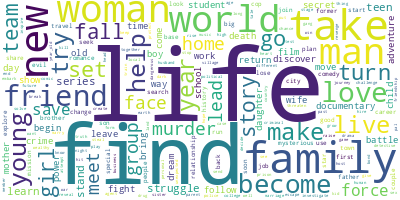

In [20]:
# Import the wordcloud library
from wordcloud import WordCloud
import itertools

# Join the different processed titles together
list_of_words = list(itertools.chain.from_iterable(data_lemmatized))
long_string = ','.join(word for word in list_of_words)
long_string

# # Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue', collocations = False,  random_state=1)

# # Generate a word cloud
wordcloud.generate(long_string)

# # Visualize the word cloud
wordcloud.to_image()

In [21]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Filter out tokens that appear in only 1 documents and appear in more than 90% of the documents
id2word.filter_extremes(no_below=2, no_above=0.9)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:10])
# print(id2word[:10])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)], [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(26, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1)], [(34, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)], [(59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)], [(12, 1), (14, 1), (53, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1)], [(32, 1), (55, 1), (56, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)], [(87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1)]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


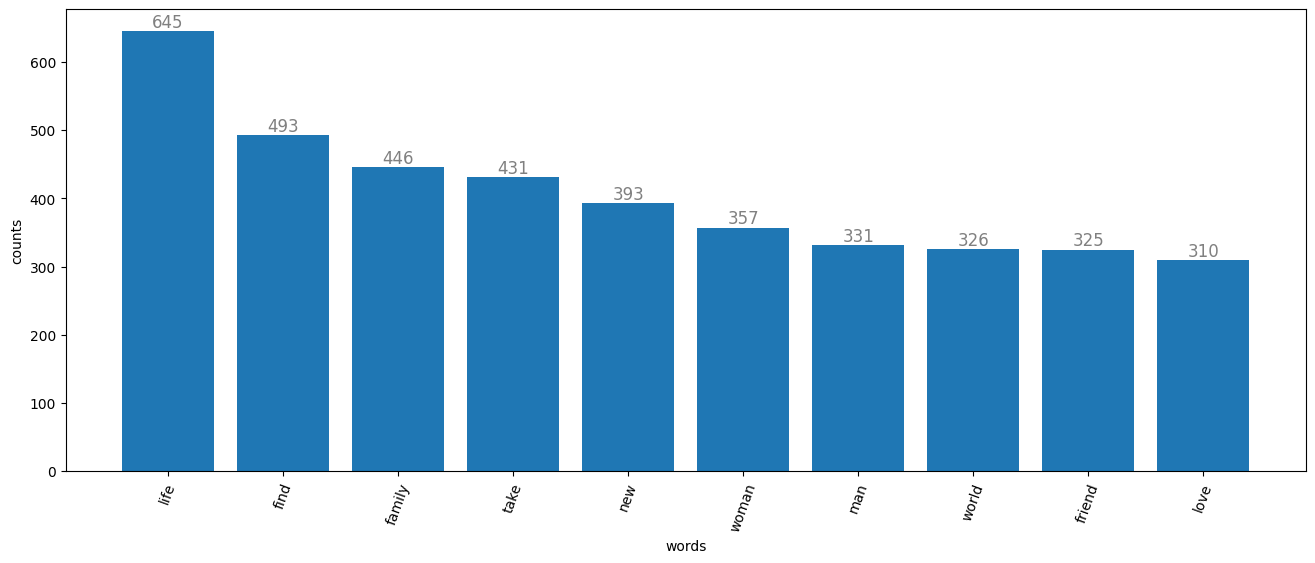

In [22]:
import operator


word_freq = []
word_list = []
count_dict = {}
for n in id2word.values():
    count_dict[n] = list_of_words.count(n)
sorted_dict = sorted(count_dict.items(), key=operator.itemgetter(1), reverse=True)[0:10]

plt.figure(figsize=(16,6))
plt.bar(range(len(sorted_dict)), [val[1] for val in sorted_dict], align='center')
plt.xticks(range(len(sorted_dict)), [val[0] for val in sorted_dict])
plt.xticks(rotation=70)
plt.xlabel('words')
plt.ylabel('counts')

# setting data labels
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='grey', ha='center', va='bottom')
    
plt.show()


#### 2.3 Hyperparameter Tuning for LDA Model

In [23]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"love" + 0.018*"join" + 0.018*"life" + 0.016*"relationship" + '
  '0.015*"friendship" + 0.014*"police" + 0.013*"game" + 0.012*"follow" + '
  '0.012*"drug" + 0.011*"train"'),
 (1,
  '0.023*"crime" + 0.021*"lead" + 0.015*"take" + 0.014*"mysterious" + '
  '0.013*"know" + 0.012*"son" + 0.012*"agent" + 0.012*"secret" + 0.012*"city" '
  '+ 0.011*"death"'),
 (2,
  '0.030*"come" + 0.020*"star" + 0.020*"solve" + 0.020*"keep" + '
  '0.018*"detective" + 0.016*"case" + 0.014*"murder" + 0.014*"life" + '
  '0.014*"best_friend" + 0.013*"film"'),
 (3,
  '0.025*"new" + 0.024*"friend" + 0.016*"family" + 0.016*"find" + '
  '0.014*"learn" + 0.014*"student" + 0.012*"discover" + 0.012*"school" + '
  '0.011*"home" + 0.011*"turn"'),
 (4,
  '0.029*"help" + 0.022*"begin" + 0.022*"child" + 0.013*"land" + 0.011*"body" '
  '+ 0.011*"big" + 0.010*"grow" + 0.010*"call" + 0.010*"small_town" + '
  '0.010*"team"'),
 (5,
  '0.028*"series" + 0.019*"comedy" + 0.014*"show" + 0.014*"story" + '
  '0.013*"world"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Evaluate base model- Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.3405712658647341


In [93]:
# supporting function
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=50,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
# Iterate over possible number of topics. takes about 2-3mins
topic_param = [0,5,10,15,20,25,30,35,40]
coherence_score = []

for k in topic_param:
    cv = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k)
    coherence_score.append(cv)

param_tuning_coherence = pd.DataFrame()
param_tuning_coherence["topic_param"] = topic_param
param_tuning_coherence['coherence_score'] = coherence_score
param_tuning_coherence

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_param,coherence_score
0,0,0.373662
1,5,0.358692
2,10,0.351635
3,15,0.367086
4,20,0.353153
5,25,0.359639
6,30,0.353839
7,35,0.354268
8,40,0.347970


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


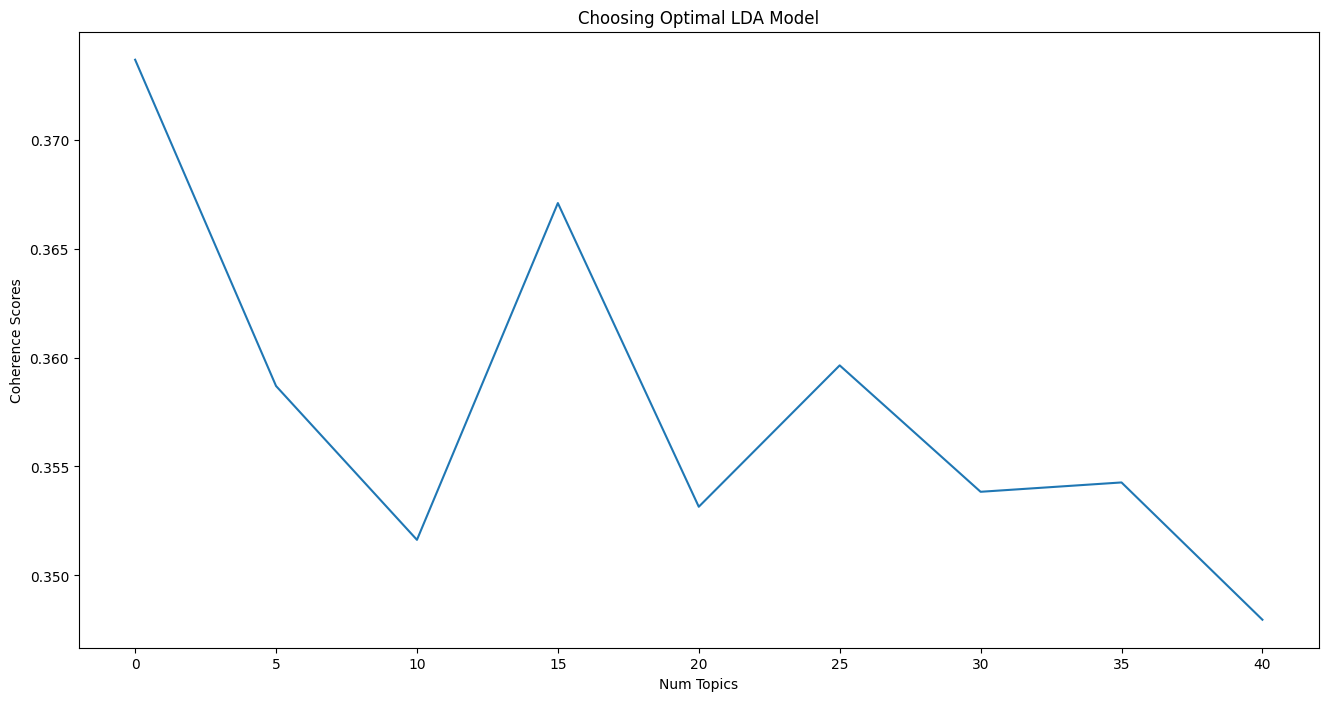

In [95]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(topic_param, param_tuning_coherence['coherence_score'])

plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Coherence Scores")
plt.show()



#### 2.4 Final LDA Model

In [124]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=20,
                                           alpha=0.01,
                                           eta=0.05
                                           )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
# Print the Keyword in the 15 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.033*"life" + 0.023*"love" + 0.019*"show" + 0.016*"man" + 0.013*"go" + '
  '0.013*"take" + 0.012*"good" + 0.012*"relationship" + 0.011*"share" + '
  '0.011*"stage"'),
 (1,
  '0.016*"form" + 0.016*"man" + 0.012*"young" + 0.012*"mysterious" + '
  '0.011*"become" + 0.011*"fall" + 0.011*"help" + 0.010*"daughter" + '
  '0.010*"death" + 0.010*"kill"'),
 (2,
  '0.019*"murder" + 0.018*"find" + 0.017*"crime" + 0.014*"woman" + '
  '0.011*"search" + 0.009*"try" + 0.009*"father" + 0.008*"young" + '
  '0.008*"reality_serie" + 0.008*"secret"'),
 (3,
  '0.018*"adventure" + 0.017*"become" + 0.016*"team" + 0.015*"world" + '
  '0.015*"new" + 0.014*"save" + 0.013*"city" + 0.013*"girl" + 0.013*"evil" + '
  '0.012*"friend"'),
 (4,
  '0.025*"world" + 0.016*"pal" + 0.015*"explore" + 0.013*"adventure" + '
  '0.012*"magical" + 0.011*"life" + 0.011*"fun" + 0.011*"bring" + 0.010*"wild" '
  '+ 0.010*"series"'),
 (5,
  '0.021*"stand" + 0.020*"head" + 0.018*"series" + 0.014*"comedy" + '
  '0.013*"special" 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
def Sort_Tuple(tup):  
    return(sorted(tup, key = lambda x: x[1], reverse = True))   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
doc_num, topic_num, prob = [], [], []
print(lda_model.get_document_topics(corpus))
for n in range(len(df)):
    get_document_topics = lda_model.get_document_topics(corpus[n])
    doc_num.append(n)
    sorted_doc_topics = Sort_Tuple(get_document_topics)
    topic_num.append(sorted_doc_topics[0][0])
    prob.append(sorted_doc_topics[0][1])
df['Doc'] = doc_num
df['Topic'] = topic_num
df['Probability'] = prob
df.to_csv("doc_topic_matrix.csv", index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### 2.5 Visualize Topics

In [125]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.146890 -0.023170       1        1   4.419889
1     -0.168122 -0.049410       2        1   8.178087
2      0.199283 -0.111887       3        1   4.891171
3     -0.226361 -0.097071       4        1  12.371589
4     -0.222490 -0.015775       5        1   8.383244
5     -0.002878 -0.021942       6        1   6.551775
6     -0.071578 -0.038937       7        1   5.864628
7      0.165559  0.067549       8        1   5.030849
8     -0.053500  0.151499       9        1   7.339097
9     -0.015416  0.227132      10        1   6.623497
10     0.044013  0.165143      11        1   6.242613
11     0.098336  0.056796      12        1   4.723688
12     0.009230 -0.137451      13        1   5.671171
13     0.096095 -0.230558      14        1   8.153358
14     0.000938  0.058082      15        1   5.555344, topic_info=          Term        Freq       Total Category  logprob  loglift
553     series  407.000000  407.000000  Default  30.0000  30.0000
12        take  518.000000  518.000000  Default  29.0000  29.0000
157        get  387.000000  387.000000  Default  28.0000  28.0000
258  adventure  394.000000  394.000000  Default  27.0000  27.0000
346       turn  323.000000  323.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
198     doctor   58.435061   86.720566  Topic15  -4.1730   2.4956
55        life  106.786002  905.677881  Topic15  -3.5701   0.7526
616       face   52.077278  213.905748  Topic15  -4.2882   1.4776
90        find   53.313126  604.406982  Topic15  -4.2648   0.4623
53      family   52.827852  738.425424  Topic15  -4.2739   0.2529

[611 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
926       8  0.978812        act
1215      8  0.987039      actor
258       2  0.998716  adventure
316      12  0.987319        age
605      14  0.991298      agent
...     ...       ...        ...
58        5  0.191273      young
58        7  0.044630      young
58       13  0.133891      young
58       14  0.175333      young
1286     13  0.981925     zombie

[654 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

#### 2.6  Top 10 recommended tv shows/movies based on topic modelling

In [127]:
def recommend_by_storyline(title, df):
    recommended = []
    top10_list = []
    
    title = title.lower()
    df['title'] = df['title'].str.lower()
    topic_num = df[df['title']==title].Topic.values
    doc_num = df[df['title']==title].Doc.values    
    
    output_df = df[df['Topic']==topic_num[0]].sort_values('Probability', ascending=False).reset_index(drop=True)

    index = output_df[output_df['Doc']==doc_num[0]].index[0]
    
    top10_list += list(output_df.iloc[index-5:index].index)
    top10_list += list(output_df.iloc[index+1:index+6].index)
    
    output_df['title'] = output_df['title'].str.title()
    
    for each in top10_list:
        recommended.append(output_df.iloc[each].title)
        
    return recommended


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
recommend_by_storyline("Avengers: Infinity War", df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Inkheart',
 'Invisible',
 'American Warfighter',
 'See You Yesterday',
 'Kingdoms Of The Sky',
 'Barbie: Spy Squad',
 'Heartbreakers',
 'Ultraviolet',
 'People You May Know',
 'Netflix Presents: The Characters']

In [136]:
recommend_by_storyline("transformers prime", df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Mike Birbiglia: The New One',
 'The Men Who Stare At Goats',
 'El Camino: A Breaking Bad Movie',
 'Born In Syria',
 'Restless Creature: Wendy Whelan',
 'One-Punch Man',
 'Dhoondte Reh Jaoge',
 'The Rachel Divide',
 'Rudy Habibie',
 'Samantha!']

In [140]:
recommend_by_storyline("bakugan: battle planet", df)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Jora 10 Numbaria',
 'The Deep',
 'Saint Seiya',
 'Silver Spoon',
 'Stoked',
 'Woody Woodpecker',
 'Shortcut Safari',
 'Gringo: The Dangerous Life Of John Mcafee',
 'Creep 2',
 'Pokémon The Movie: I Choose You!']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
